<a href="https://colab.research.google.com/github/noman13bd/ML-Practice/blob/master/ML_KNN_assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
# Import DataSet
import pandas as pd
from matplotlib import pyplot as plt
# create 2 data frame. 1 for regression and another for classification
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weight-height.csv')
df_regression = df.copy()
df_classification = df.copy()
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [78]:
# before doing regression separate X (gender, height) and Y (weight)
col_x_regr = df_regression[['Gender', 'Height']].copy()
col_y_regr = df_regression[['Weight']].copy()
# col_y_regr.head()
col_x_regr.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


# label Encoding

In [79]:
# apply label encoding on X
from sklearn.preprocessing import LabelEncoder
from pandas.api.types import is_string_dtype

le = LabelEncoder()
all_columns = col_x_regr.columns
for column in all_columns:
  if is_string_dtype(col_x_regr[column]):
    # col_x_regr[column] = le.fit_transform(col_x_regr[column])
    col_x_regr.loc[:, column] = le.fit_transform(col_x_regr[column])

col_x_regr.head()

,Gender,Height
0,1,73.847017
1,1,68.781904
2,1,74.110105
3,1,71.730978
4,1,69.881796


# Train and Test Dataset for Linear Regression

In [80]:
# create train dataset and test dataset (70% / 30%)
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(col_x_regr, col_y_regr, test_size=0.30)

# Linear Regression, MSE, MAE

In [81]:
# apply linear regression
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

l_reg.fit(xtrain, ytrain)
# l_reg.predict([[1, 73.847017]])
test_predictions = l_reg.predict(xtest)

In [82]:
# get MSE, MAE 
from sklearn.metrics import mean_squared_error, mean_absolute_error
l_reg_mse = mean_squared_error(ytest, test_predictions)
l_reg_mse

102.44244560913585

In [83]:
l_reg_mae = mean_absolute_error(ytest, test_predictions)
l_reg_mae

7.8640594203719365

# KNN Regression, MSE, MAE

In [84]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
from sklearn.neighbors import KNeighborsRegressor
# Weight function used in prediction = uniform
kn_reg = KNeighborsRegressor(n_neighbors=5)
kn_reg.fit(xtrain, ytrain)
# kn_reg.predict([[1, 73.847017]])
knreg_test_predictions = kn_reg.predict(xtest)

# Weight function used in prediction = distance
kn_distance_reg = KNeighborsRegressor(n_neighbors=5, weights='distance')
kn_distance_reg.fit(xtrain, ytrain)
# kn_reg.predict([[1, 73.847017]])
knreg_distance_test_predictions = kn_distance_reg.predict(xtest)



In [85]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
kn_reg_mse = mean_squared_error(ytest, knreg_test_predictions)
kn_reg_mse

123.47747695775473

In [86]:
kn_reg_mae = mean_absolute_error(ytest, knreg_test_predictions)
kn_reg_mae

8.626167034102844

In [87]:
kn_reg_distance_mse = mean_squared_error(ytest, knreg_distance_test_predictions)
kn_reg_distance_mse

140.0583985156062

In [88]:
kn_reg_distance_mae = mean_absolute_error(ytest, knreg_distance_test_predictions)
kn_reg_distance_mae

9.254936990363403

# Bar Chart for obtained MSE and MAE from this 2 Algorithm

Text(0, 0.5, 'Value')

<Figure size 1440x720 with 0 Axes>

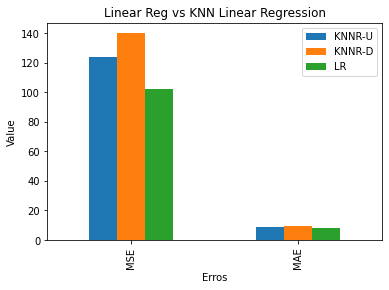

In [89]:
plt.figure(figsize=(20,10))
plotdata = pd.DataFrame({
    "KNNR-U":[kn_reg_mse, kn_reg_mae],
    "KNNR-D":[kn_reg_distance_mse, kn_reg_distance_mae],
    "LR":[l_reg_mse, l_reg_mae]
    }, 
    index=["MSE", "MAE"]
)
plotdata.plot(kind="bar")
plt.title("Linear Reg vs KNN Linear Regression")
plt.xlabel("Erros")
plt.ylabel("Value")

1. Import data set
2. Seperate x and y (y=Gender)
3. Train = 70%, Test = 30%
4. Apply Decision Tree Classifier 
5. Evaluate Model (Accuracy, Confusion Matrix, ROC, AUC, Classification Report)
6. Apply KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


# Decision Tree Classifier

In [90]:
df_classification.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [91]:
col_x_dt_classifier = df_classification.drop('Gender', axis=1)
col_y_dt_classifier = df_classification['Gender']
col_x_dt_classifier.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


# Train and Test Dataset for DT Classifier

In [92]:
xtrain_dt, xtest_dt, ytrain_dt, ytest_dt = train_test_split(col_x_dt_classifier,col_y_dt_classifier,test_size=.30)

# Decision Tree Classifier, Score, Accuracy

[Text(0.46057423890171056, 0.9821428571428571, 'X[1] <= 158.072\ngini = 0.483\nsamples = 5988\nvalue = [2449, 3539]'),
 Text(0.17373638168612543, 0.9464285714285714, 'X[1] <= 145.66\ngini = 0.186\nsamples = 2406\nvalue = [2157, 249]'),
 Text(0.06514729839804508, 0.9107142857142857, 'X[1] <= 135.166\ngini = 0.074\nsamples = 1797\nvalue = [1728, 69]'),
 Text(0.015612272603855552, 0.875, 'X[1] <= 68.811\ngini = 0.02\nsamples = 1208\nvalue = [1196, 12]'),
 Text(0.013440130328536519, 0.8392857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.017784414879174586, 0.8392857142857143, 'X[1] <= 119.236\ngini = 0.018\nsamples = 1207\nvalue = [1196, 11]'),
 Text(0.015612272603855552, 0.8035714285714286, 'gini = 0.0\nsamples = 489\nvalue = [489, 0]'),
 Text(0.01995655715449362, 0.8035714285714286, 'X[1] <= 119.253\ngini = 0.03\nsamples = 718\nvalue = [707, 11]'),
 Text(0.017784414879174586, 0.7678571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.022128699429812652, 0.76

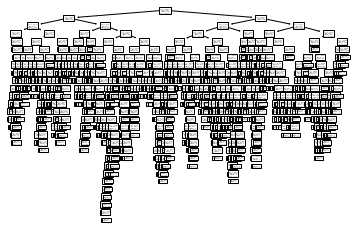

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(xtrain_dt, ytrain_dt)


tree.plot_tree(dt_clf)

[Text(0.46057423890171056, 0.9821428571428571, 'Weight <= 158.072\ngini = 0.483\nsamples = 5988\nvalue = [2449, 3539]'),
 Text(0.17373638168612543, 0.9464285714285714, 'Weight <= 145.66\ngini = 0.186\nsamples = 2406\nvalue = [2157, 249]'),
 Text(0.06514729839804508, 0.9107142857142857, 'Weight <= 135.166\ngini = 0.074\nsamples = 1797\nvalue = [1728, 69]'),
 Text(0.015612272603855552, 0.875, 'Weight <= 68.811\ngini = 0.02\nsamples = 1208\nvalue = [1196, 12]'),
 Text(0.013440130328536519, 0.8392857142857143, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.017784414879174586, 0.8392857142857143, 'Weight <= 119.236\ngini = 0.018\nsamples = 1207\nvalue = [1196, 11]'),
 Text(0.015612272603855552, 0.8035714285714286, 'gini = 0.0\nsamples = 489\nvalue = [489, 0]'),
 Text(0.01995655715449362, 0.8035714285714286, 'Weight <= 119.253\ngini = 0.03\nsamples = 718\nvalue = [707, 11]'),
 Text(0.017784414879174586, 0.7678571428571429, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.022128699429

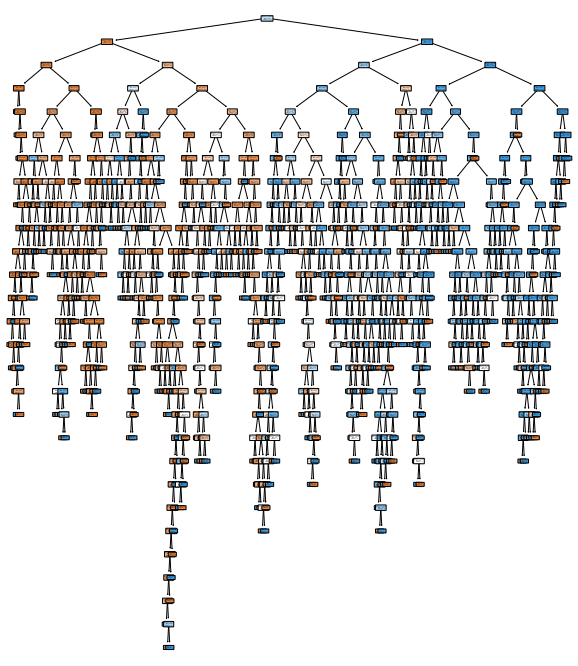

In [98]:
plt.figure(figsize=(10,12))
tree.plot_tree(dt_clf, rounded=True, filled=True,  feature_names=xtrain_dt.columns )

In [94]:
# score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, plot_roc_curve
import numpy as np

dtc_predictions = dt_clf.predict(xtest_dt)
dtc_predictions

np.array(dtc_predictions)
classification_report(ytest_dt, dtc_predictions)

'              precision    recall  f1-score   support\n\n      Female       0.87      0.85      0.86      1106\n        Male       0.89      0.90      0.89      1461\n\n    accuracy                           0.88      2567\n   macro avg       0.88      0.87      0.88      2567\nweighted avg       0.88      0.88      0.88      2567\n'

In [95]:
print(classification_report(ytest_dt, dtc_predictions))

              precision    recall  f1-score   support

      Female       0.87      0.85      0.86      1106
        Male       0.89      0.90      0.89      1461

    accuracy                           0.88      2567
   macro avg       0.88      0.87      0.88      2567
weighted avg       0.88      0.88      0.88      2567



In [96]:
confusion_matrix(ytest_dt, dtc_predictions)

array([[ 938,  168],
       [ 144, 1317]])

In [103]:
tp, fn, fp, tn = confusion_matrix(ytest_dt, dtc_predictions).reshape(-1) 

In [104]:
(tp+tn)/(tp+tn+fp+fn)

0.8784573432021815

In [99]:
accuracy_score(ytest_dt, dtc_predictions)

0.8784573432021815

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


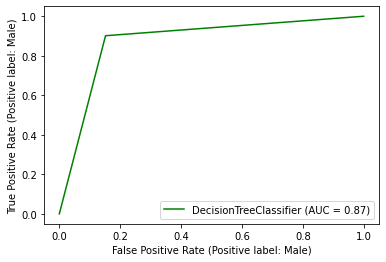

In [105]:
plot_roc_curve(dt_clf, xtest_dt, ytest_dt, color='GREEN')